# Common Patterns

### Setting Up

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
from matplotlib import style

import matplotlib.pyplot as plt
import numpy as np

In [0]:
style.use('ggplot')

In [0]:
def plot_time_series(time_, series_, format_='-', start=0, end=None, label=None):
  plt.plot(time_[start : end], series_[start : end], format_, label=label)
  plt.xlabel("Time")
  plt.ylabel("Value")

  if label:
    plt.legend(fontsize=14)  

### Trend

In [0]:
def trend(time_, slope_=0):
  return time_ * slope_

[   0    1    2 ... 1458 1459 1460]
[ 10.   10.1  10.2 ... 155.8 155.9 156. ]



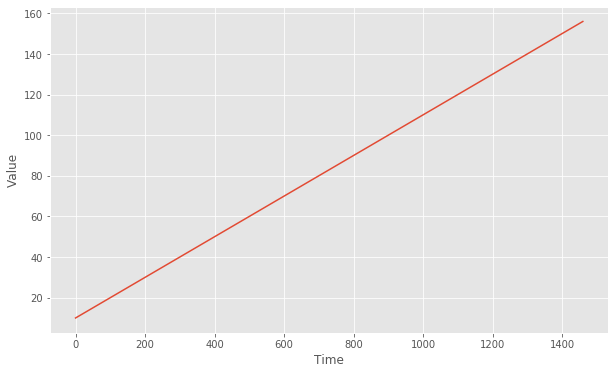

In [0]:
baseline = 10
time_ = np.arange(4 * 365 + 1)
series_ = baseline + trend(time_=time_, slope_=0.1)

print("{}".format(time_))
print("{}\n".format(series_))

plt.figure(figsize=(10, 6))
plot_time_series(time_=time_, series_=series_)
plt.show()

In [0]:
arr_1 = np.arange(10)
print(arr_1)

print(np.where(arr_1 <= 4, arr_1, 10 * arr_1))

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4 50 60 70 80 90]


In [0]:
arr_1 = np.linspace(start=0, stop=10, num=200)
print("{}\n".format(arr_1))

print("{}".format(np.where(arr_1 < 5, np.cos(arr_1 * 2 * np.pi), 1 / np.exp(3 * arr_1))))

[ 0.          0.05025126  0.10050251  0.15075377  0.20100503  0.25125628
  0.30150754  0.35175879  0.40201005  0.45226131  0.50251256  0.55276382
  0.60301508  0.65326633  0.70351759  0.75376884  0.8040201   0.85427136
  0.90452261  0.95477387  1.00502513  1.05527638  1.10552764  1.15577889
  1.20603015  1.25628141  1.30653266  1.35678392  1.40703518  1.45728643
  1.50753769  1.55778894  1.6080402   1.65829146  1.70854271  1.75879397
  1.80904523  1.85929648  1.90954774  1.95979899  2.01005025  2.06030151
  2.11055276  2.16080402  2.21105528  2.26130653  2.31155779  2.36180905
  2.4120603   2.46231156  2.51256281  2.56281407  2.61306533  2.66331658
  2.71356784  2.7638191   2.81407035  2.86432161  2.91457286  2.96482412
  3.01507538  3.06532663  3.11557789  3.16582915  3.2160804   3.26633166
  3.31658291  3.36683417  3.41708543  3.46733668  3.51758794  3.5678392
  3.61809045  3.66834171  3.71859296  3.76884422  3.81909548  3.86934673
  3.91959799  3.96984925  4.0201005   4.07035176  4.

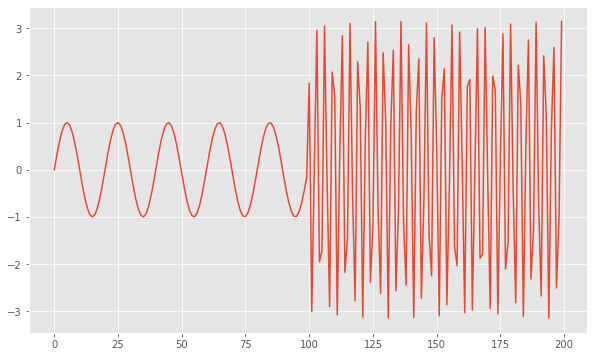

In [0]:
arr_2 = np.where(arr_1 < 5, np.sin(arr_1 * 2 * np.pi), np.pi * np.cos(3 * arr_1 * 4 * np.pi))

plt.figure(figsize=(10, 6))
plt.plot(range(len(arr_2)), arr_2)
plt.show()

### Seasonality

In [0]:
def seasonal_pattern(season_time):
  return np.where(season_time < 0.4, 
                  np.cos(season_time * 2 * np.pi), 
                  1 / np.exp(3 * season_time))

def seasonality(time_, period, amplitude=1, phase=0):
  season_time = ((time_ + phase) % period) / period
  return amplitude * seasonal_pattern(season_time=season_time)

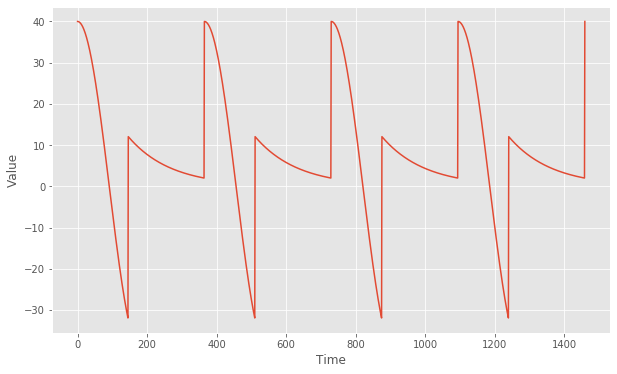

In [0]:
amplitude = 40
series_ = seasonality(time_=time_, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_time_series(time_=time_, series_=series_)
plt.show()

### Trend + Seasonality

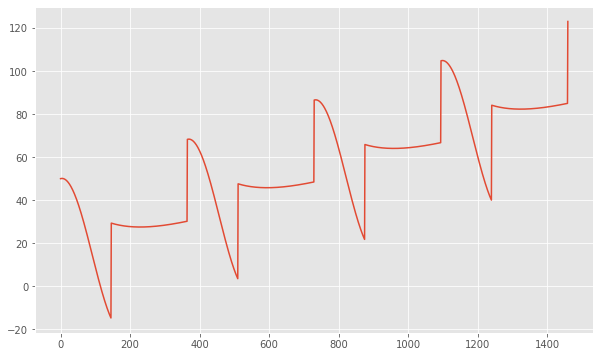

In [0]:
slope_ = 0.05
series_ = baseline + trend(time_=time_, slope_=slope_) + seasonality(time_=time_, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plt.plot(time_, series_)
plt.show()

### Noise

In [0]:
def white_noise(time_, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time_)) * noise_level

In [0]:
np.random.seed(0)
np.random.rand(4)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318])

In [0]:
print(np.random.rand(4))
print(np.random.rand(4))

[0.4236548  0.64589411 0.43758721 0.891773  ]
[0.96366276 0.38344152 0.79172504 0.52889492]


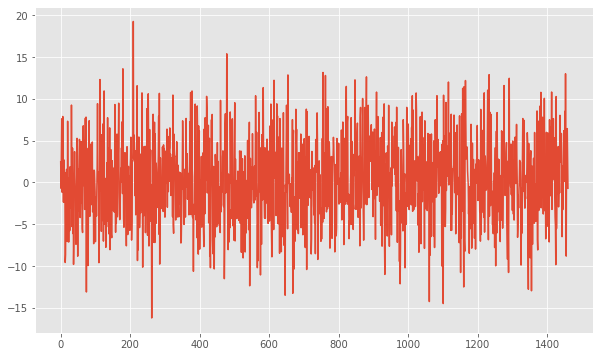

In [0]:
noise_level = 5
noise_ = white_noise(time_=time_, noise_level=noise_level, seed=42)

plt.figure(figsize=(10, 6))
plt.plot(time_, noise_)
plt.show()

### Trend + Seasonality + Noise

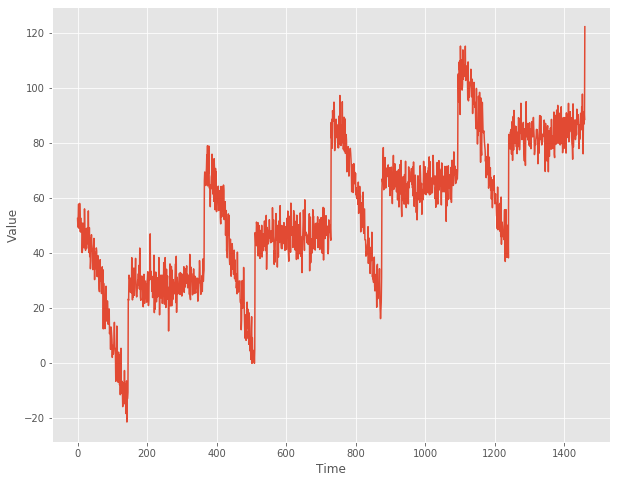

In [0]:
series_ = baseline + trend(time_=time_, slope_=slope_) + seasonality(time_=time_, period=365, amplitude=amplitude) 
series_ += white_noise(time_=time_, noise_level=noise_level, seed=42)

plt.figure(figsize=(10, 8))
plot_time_series(time_=time_, series_=series_)
plt.show()